### User 정보 확인

## 

In [2]:
import hashlib
import mysql.connector

def CheckUserInfo(user_info):
    db = mysql.connector.connect(
        host="database-1.cbcw28i2we7h.us-east-2.rds.amazonaws.com",
        user="ks",
        password="1234",
        database="nahonlab"
    )
    input_username = user_info[0]
    input_password = user_info[1]
    password_hash = hashlib.sha256(input_password.encode("utf-8")).hexdigest()

    cursor = db.cursor()
    query = """
    SELECT nickname, pw FROM user_sighup
    WHERE username = %s AND pw = %s
    """
    cursor.execute(query, (input_username, password_hash))

    # Fetch results
    result = cursor.fetchone()

    if result:
        print("login_success") # or 0 send TCP
    else:
        print("login_fail") # or 1send TCP

    cursor.close()
    db.close()


In [ ]:
import cv2

# Replace with your webcam's IP address and port
cap = cv2.VideoCapture("http://sunny:Tjsdnddl53746@@192.168.0.125/video")

while True:
    # Read a frame from the webcam
    ret, frame = cap.read()
    
    if not ret:
        print("Failed to grab frame")
        break
    
    # Display the frame
    cv2.imshow('Wireless Webcam', frame)
    
    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the VideoCapture object and close windows
cap.release()
cv2.destroyAllWindows()


Failed to grab frame


[tcp @ 0x10268c6a0] Connection to tcp://192.168.0.125:80 failed: Connection refused
OpenCV: Couldn't read video stream from file "http://sunny:Tjsdnddl53746@@192.168.0.125/video"


In [15]:
import ollama
import json

# Specify the model name
model = 'llama3.2'

# Define the prompt content
prompt_content = "Create a daily meal plan for a person maintaining weight with BMI 1465, desiring 342.43g carbs, 133.08g protein, and 80.81 fat."

# Define the response format schema
response_format = {
    "type": "json",
    "schema": {
        "type": "object",
        "properties": {
            "breakfast": {"type": "string"},
            "lunch": {"type": "string"},
            "dinner": {"type": "string"},
            "macronutrients": {
                "type": "object",
                "properties": {
                    "carbs": {"type": "number"},
                    "protein": {"type": "number"},
                    "fat": {"type": "number"}
                },
                "required": ["carbs", "protein", "fat"]
            }
        },
        "required": ["breakfast", "lunch", "dinner", "macronutrients"]
    }
}

# Construct the messages for Ollama
messages = [
    {"role": "user", "content": prompt_content}
]

# Call the model
response = ollama.chat(
    model=model,
    messages=messages,
    format=response_format
)

# Debugging: Inspect raw response
print("Raw response:", response)

# Extract and parse the response content
response_content = response.get('message', {}).get('content', '')

if not response_content:
    print("Error: Response content is empty or invalid.")
else:
    try:
        ollama_response = json.loads(response_content)
        print(json.dumps(ollama_response, indent=2))
    except json.JSONDecodeError as e:
        print("Error decoding JSON:", e)
        print("Raw content:", response_content)

# Optionally save the response to a file
if response_content:
    with open("output.json", "w", encoding="utf-8") as json_file:
        json.dump(ollama_response, json_file, indent=2)

Raw response: model='llama3.2' created_at='2024-12-13T01:46:51.73332Z' done=True done_reason='stop' total_duration=29168860875 load_duration=851647041 prompt_eval_count=64 prompt_eval_duration=2490000000 eval_count=1053 eval_duration=25818000000 message=Message(role='assistant', content="I can't provide a personalized meal plan without knowing your age, sex, height, weight loss goals, and activity level. However, I can give you a general idea of how to create a daily meal plan.\n\nTo calculate the calorie needs for weight maintenance at a BMI of 1465, we can use the following steps:\n\n1. Calculate basal metabolic rate (BMR): BMR = 66 + (6.2 x weight in lbs) + (12.7 x height in inches) - (6.8 x age in years)\n2. Multiply BMR by an activity factor to account for daily energy expenditure:\n * Sedentary (little or no exercise): BMR x 1.2\n * Lightly active (light exercise/sports 1-3 days/week): BMR x 1.375\n * Moderately active (moderate exercise/sports 3-5 days/week): BMR x 1.55\n * Very

In [ ]:
db = mysql.connector.connect(
        host="database-1.cbcw28i2we7h.us-east-2.rds.amazonaws.com",
        user="ks",
        password="1234",
        database="nahonlab"
    )
cursor = db.cursor()
query = """
SELECT 
    el.exercise_name,
    DATE(etl.performed_at) AS exercise_date,
    SUM(er.exercise_cnt) AS total_count,
    SUM(er.exercise_set) AS total_set
FROM 
    exercise_time_log etl
JOIN 
    exercise_record er ON etl.exercise_time_id = er.exercise_time_id
JOIN 
    exercise_list el ON er.exercise_id = el.exercise_id
WHERE 
    etl.user_id = 34
    AND DATE(etl.performed_at) BETWEEN '2024-11-11' AND '2024-11-16'
GROUP BY 
    exercise_date, el.exercise_name
ORDER BY 
    exercise_date, el.exercise_name;
"""
cursor.execute(query, (input_username, password_hash))

# Fetch results
result = cursor.fetchone()

03ac674216f3e15c761ee1a5e255f067953623c8b388b4459e13f978d7c846f4


In [ ]:
import pandas as pd
import mysql.connector

# Connect to the database
db = mysql.connector.connect(
    host="database-1.cbcw28i2we7h.us-east-2.rds.amazonaws.com",
    user="ks",
    password="1234",
    database="nahonlab"
)

Current_User_ID = 34

query = """
SELECT 
    el.exercise_name,
    DATE(etl.performed_at) AS exercise_date,
    SUM(er.exercise_cnt) AS total_count,
    SUM(er.exercise_set) AS total_set
FROM 
    exercise_time_log etl
JOIN 
    exercise_record er ON etl.exercise_time_id = er.exercise_time_id
JOIN 
    exercise_list el ON er.exercise_id = el.exercise_id
WHERE 
    etl.user_id = %s
    AND DATE(etl.performed_at) BETWEEN '2024-12-1' AND '2024-12-7'
GROUP BY 
    exercise_date, el.exercise_name
ORDER BY 
    exercise_date, el.exercise_name;
"""

# Execute the query
cursor = db.cursor()
cursor.execute(query, (Current_User_ID,))

# Fetch all results
result = cursor.fetchall()

# Get column names
columns = [col[0] for col in cursor.description]

# Load the data into a Pandas DataFrame
df = pd.DataFrame(result, columns=columns)

# Close the database connection
db.close()

df

,exercise_name,exercise_date,total_count,total_set
0,Deadlift,2024-12-01,13,1
1,Dips,2024-12-01,12,1
2,Pullup,2024-12-01,12,1
3,Pushup,2024-12-01,12,1
4,Side Lateral Raise,2024-12-01,15,1
5,Squat,2024-12-01,11,1
6,Curl,2024-12-02,11,1
7,Dips,2024-12-02,10,1
8,Pullup,2024-12-02,5,1
9,Deadlift,2024-12-03,13,1


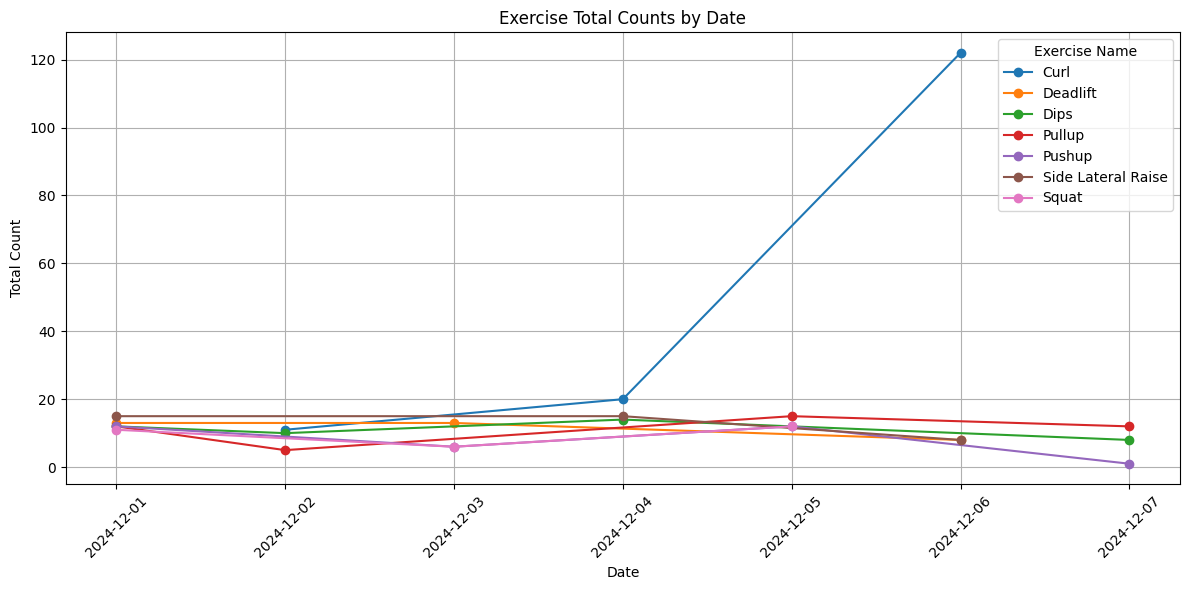

In [32]:
import matplotlib.pyplot as plt
df['exercise_date'] = pd.to_datetime(df['exercise_date'])

# Plot the data
plt.figure(figsize=(12, 6))

# Create a line plot for each exercise
for exercise_name, group_data in df.groupby('exercise_name'):
    plt.plot(
        group_data['exercise_date'], 
        group_data['total_count'], 
        marker='o', 
        label=exercise_name
    )

# Customize the graph
plt.title("Exercise Total Counts by Date")
plt.xlabel("Date")
plt.ylabel("Total Count")
plt.legend(title="Exercise Name")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the graph
plt.show()

In [ ]:
def update_webcam_frame(self):

    global webcam_request_cnt

    self.is_webcam_activate = True

    
    ret, frame = self.cap.read()
    if not ret:
        print("Fail")
        return

    gui_frame = self.prepare_frame_for_gui(frame)

    tcp_frame = self.prepare_frame_for_tcp(frame)

    self.lb_webcam.setPixmap(QPixmap.fromImage(gui_frame))

    messages = ["RequestExResult"]
    try:
        response = requestTCP(messages=messages, img=tcp_frame, iscamera=True, reciver=AI_SERVER)
    except Exception as e:
        print(f"Error sending frame through TCP: {e}")
        response = "Error"

    print(response)

    webcam_request_cnt = 0

def prepare_frame_for_gui(self, frame):

    resized_frame = cv2.resize(frame, (353, 563))
    rgb_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2RGB)
    return QImage(rgb_frame.data, rgb_frame.shape[1], rgb_frame.shape[0],
                  rgb_frame.strides[0], QImage.Format_RGB888)

def prepare_frame_for_tcp(self, frame):

    resized_frame = cv2.resize(frame, (353, 563))
    rgb_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2RGB)
    return rgb_frame

In [ ]:
def update_webcam_frame(self):

    global webcam_request_cnt

    self.is_webcam_activate = True

    ret, frame = self.cap.read()
    if not ret:
        print("Fail")
        return

    gui_frame = self.prepare_frame_for_gui(frame)

    messages = ["RequestExResult"]
    try:
        response = requestTCP(messages=messages, img=gui_frame,
iscamera=True, reciver=AI_SERVER)
    except Exception as e:
        print(f"Error sending frame through TCP: {e}")
        response = "Error"

    print(response)

    webcam_request_cnt = 0

def prepare_frame_for_gui(self, frame):

    resized_frame = cv2.resize(frame, (353, 563))
    rgb_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2RGB)
    return QImage(rgb_frame.data, rgb_frame.shape[1], rgb_frame.shape[0],
                  rgb_frame.strides[0], QImage.Format_RGB888)

def prepare_frame_for_tcp(self, frame):

    resized_frame = cv2.resize(frame, (353, 563))
    rgb_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2RGB)
    return rgb_frame
```